In [1]:
using Pkg
Pkg.add("Clustering")

    Updating registry at `C:\Users\liber\.julia\registries\General.toml`
   Resolving package versions...
   Installed Qt5Base_jll ─ v5.15.3+2
   Installed Clustering ── v0.14.3
    Updating `C:\Users\liber\.julia\environments\v1.7\Project.toml`
  [aaaa29a8] + Clustering v0.14.3
    Updating `C:\Users\liber\.julia\environments\v1.7\Manifest.toml`
  [aaaa29a8] ↑ Clustering v0.14.2 ⇒ v0.14.3
  [ea2cea3b] ↑ Qt5Base_jll v5.15.3+1 ⇒ v5.15.3+2
Precompiling project...
  ✓ Qt5Base_jll
  ✓ Clustering
  ✓ GR_jll
  ✓ GR
  ✓ StatsKit
  ✓ Plots
  ✓ StatsPlots
  7 dependencies successfully precompiled in 90 seconds (248 already precompiled, 1 skipped during auto due to previous errors)


In [2]:
using Distributions
using Plots; gr()
using DataFrames

In [67]:
f(x) = sqrt(1 - x^2)
X = rand(Uniform(-1, 1), 200) 
Y = f.(X) .* rand((-1, 1), 200) + rand(Normal(0, 0.1), 200) 

200-element Vector{Float64}:
 -0.9533798850368626
  0.5033293877034256
 -1.0253445574871727
 -0.46238486790564287
  0.655249140424008
  1.0114685394864709
  1.0942951704157104
 -0.384154973701707
 -0.698970365752608
  0.6308330351103656
  ⋮
  1.0363725680936187
  1.076056231109898
 -0.41680018119673545
 -0.9802038918371946
  0.3426161643466803
 -0.6489091706323064
  0.43672940705877206
  0.37159417958782154
 -1.132415650045813

In [68]:
Data = DataFrame(x = X, y = Y)

,x,y
,Float64,Float64
1,0.422955,-0.95338
2,-0.85253,0.503329
3,-0.285432,-1.02534
4,0.850666,-0.462385
5,-0.799644,0.655249
6,0.362891,1.01147
7,0.0215557,1.0943
8,-0.872245,-0.384155
9,-0.694514,-0.69897


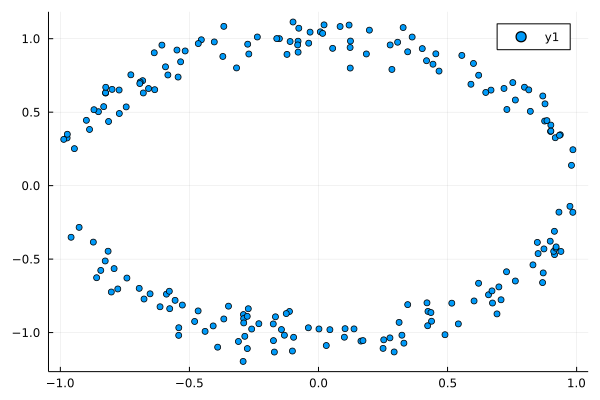

In [69]:
scatter(Data.x, Data.y)

In [70]:
X2 = rand(Uniform(-1, 1), 200) 
Y2 = (f.(X2) + rand(Normal(2.5, 0.3), 200)) .* rand((-1, 1), 200) 

200-element Vector{Float64}:
 -2.406073629303826
  3.4372028489491844
 -3.338484157341693
 -3.2866536282467367
  2.765255742958156
 -2.7226542915316636
 -2.8929564581148033
  2.837270400237539
  3.649526543705565
  3.3571624327620695
  ⋮
  3.3679493134591265
 -2.5113256444901304
 -3.7273447088580003
  3.2424166987784213
 -3.5335564186435695
  2.69784038285107
  3.151083372974299
 -2.397826204591051
  3.7070722160902942

In [71]:
Data2 = DataFrame(x = X2, y = Y2)
DF = append!(Data, Data2)

,x,y
,Float64,Float64
1,0.422955,-0.95338
2,-0.85253,0.503329
3,-0.285432,-1.02534
4,0.850666,-0.462385
5,-0.799644,0.655249
6,0.362891,1.01147
7,0.0215557,1.0943
8,-0.872245,-0.384155
9,-0.694514,-0.69897


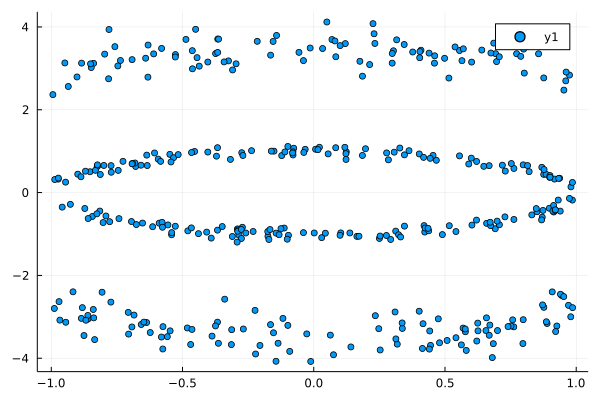

In [72]:
scatter(DF.x, DF.y)

In [73]:
using Clustering

In [74]:
matriz = transpose(Matrix(DF))

2×400 transpose(::Matrix{Float64}) with eltype Float64:
  0.422955  -0.85253   -0.285432   0.850666  …  0.601461   0.90862  -0.362621
 -0.95338    0.503329  -1.02534   -0.462385     3.15108   -2.39783   3.70707

In [75]:
c1 = kmeans(matriz, 3)

KmeansResult{Matrix{Float64}, Float64, Int64}([0.010008284579637108 0.0066968144080823315 0.049303251428434655; -0.031297150584355136 3.300232218791077 -3.2523628938934097], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 3, 3, 2, 3, 2, 2, 3, 2], [1.0207614990192526, 1.029797463736982, 1.0754149882603565, 0.8925418450399578, 1.126883074523234, 1.2118866627080325, 1.2670914159435829, 0.9028794367659787, 0.942139464211955, 0.9125885490361718  …  1.0384456339474184, 0.1917853454591132, 1.3649020627268236, 0.23411853369792368, 0.24525843918420875, 0.1485528440320465, 1.2721773702346972, 0.37599036117642726, 1.4686577464223216, 0.3019144506716174], [200, 93, 107], [200, 93, 107], 302.30825370006255, 2, true)

In [76]:
assignments(c1)

400-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 3
 3
 2
 3
 2
 2
 3
 2

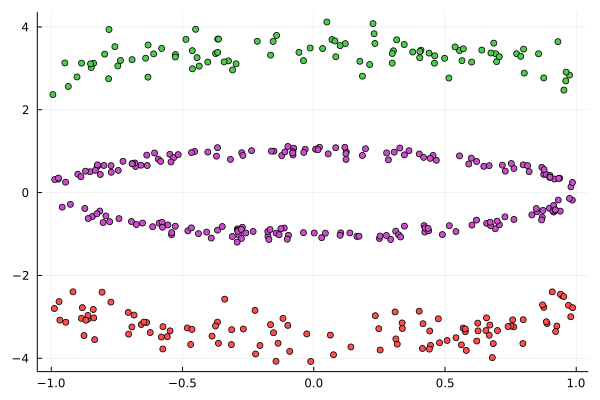

In [77]:
scatter(DF.x, DF.y, marker_z= c1.assignments,
        color=:lightrainbow, legend=false)

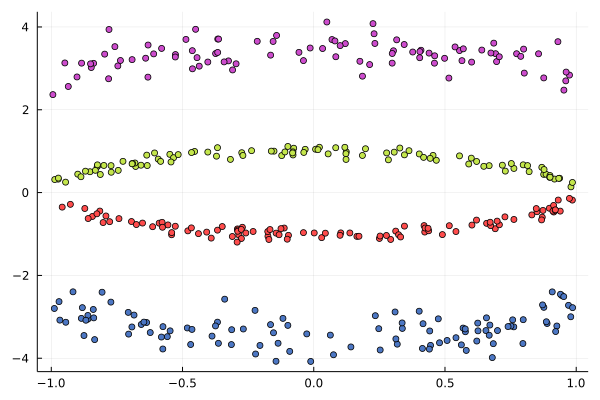

In [78]:
c2 = kmeans(matriz, 4)
scatter(DF.x, DF.y, marker_z= c2.assignments,
        color=:lightrainbow, legend=false)

In [105]:
n = 500
r = 2.2
g(x) = sqrt(r^2- x^2)
X3 = rand(Uniform(-r, r), n) 
Y3 = (g.(X3) + rand(Normal(0, 0.3), n)) .* rand((-1, 1), n) 

500-element Vector{Float64}:
  1.9805994433933014
  1.5652477106604177
  1.0173072094870221
 -1.248423079218421
  1.9795858796597194
 -2.0469061729702918
  2.271315057369941
 -1.0948559662198525
  1.9025321269812436
 -2.178688698219418
  ⋮
 -2.2426089233231536
  1.1993669270176284
  2.139624958048144
 -2.0944377692852445
  0.6138298370245949
  1.6936786157249224
 -2.1113251759930276
  1.5392677571651452
  2.341015740425438

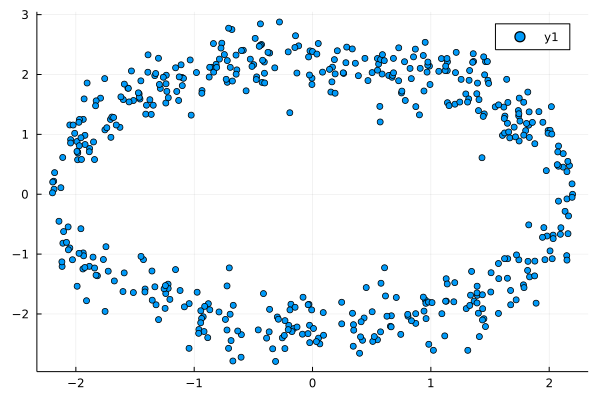

In [106]:
scatter(X3, Y3)

In [107]:
DF3 = DataFrame(x = X3, y = Y3)

,x,y
,Float64,Float64
1,-1.3331,1.9806
2,-1.51359,1.56525
3,-2.00981,1.01731
4,-1.94047,-1.24842
5,0.387449,1.97959
6,-0.923908,-2.04691
7,-1.30187,2.27132
8,1.74354,-1.09486
9,1.48188,1.90253


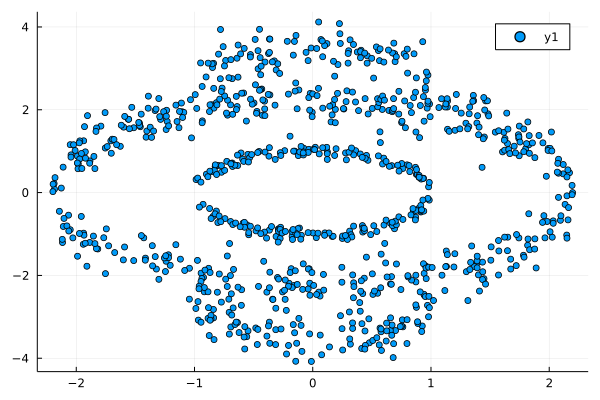

In [108]:
DF = append!(DF, DF3)
scatter(DF.x, DF.y)

In [152]:
Pkg.add("Distances")
using Distances
matriz = transpose(Matrix(DF))

   Resolving package versions...
    Updating `C:\Users\liber\.julia\environments\v1.7\Project.toml`
  [b4f34e82] + Distances v0.10.7
  No Changes to `C:\Users\liber\.julia\environments\v1.7\Manifest.toml`


In [179]:
D = pairwise(SphericalAngle(), matriz, matriz, dims=2)

900×900 Matrix{Float64}:
 0.0       1.81904   0.389364  0.58232   …  1.08944   2.50386    2.85298
 1.81904   0.0       1.59983   1.89512      2.46622   1.08524    1.6089
 0.389364  1.59983   0.0       0.95587      1.08556   2.5961     2.84478
 0.58232   1.89512   0.95587   0.0          1.40326   2.00488    2.41589
 1.91796   0.158207  1.7343    1.90518      2.61924   0.932006   1.5034
 1.96545   0.963599  2.1004    1.52938   …  2.8332    0.541459   1.30942
 2.07158   0.814212  2.13273   1.69016      3.00269   0.468626   1.24668
 1.10219   0.887688  0.765668  1.52934      1.63226   1.97292    2.29932
 0.768822  1.21124   0.416672  1.26131      1.3704    2.28267    2.60335
 1.84368   0.194167  1.68831   1.80606      2.648     0.953059   1.57194
 ⋮                                       ⋱                       
 1.25727   2.39343   1.20249   1.59244      0.189217  2.47757    1.69974
 2.39105   1.40948   2.68739   1.81537      2.35493   0.344886   0.750344
 2.75187   0.935778  2.44155   2.5

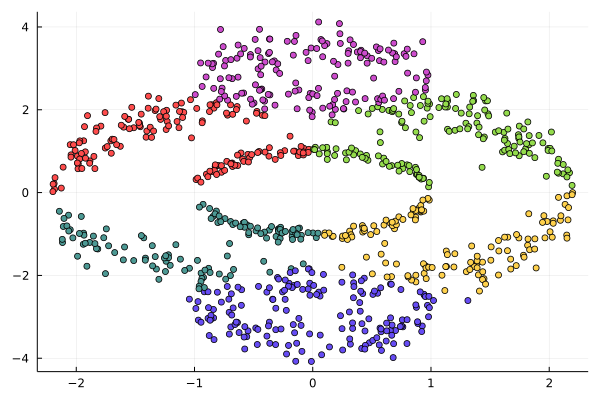

In [111]:
c2 = kmeans(matriz, 6)
scatter(DF.x, DF.y, marker_z= c2.assignments,
        color=:lightrainbow, legend=false)

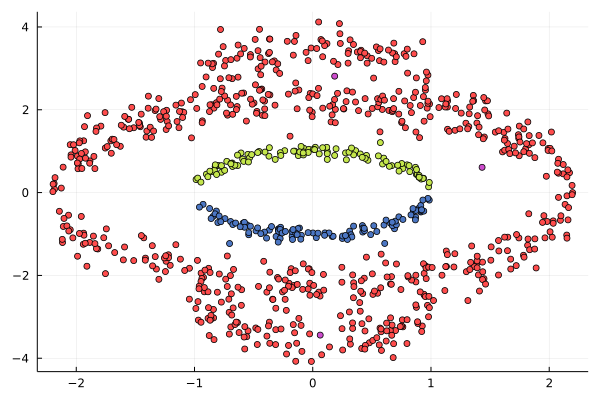

In [208]:
c4 = dbscan(D, 0.17, 4)
scatter(DF.x, DF.y, marker_z= c4.assignments,
        color=:lightrainbow, legend=false)

In [209]:
D2 = pairwise(SphericalAngle(), matriz, matriz, dims=2)

900×900 Matrix{Float64}:
 0.0       1.81904   0.389364  0.58232   …  1.08944   2.50386    2.85298
 1.81904   0.0       1.59983   1.89512      2.46622   1.08524    1.6089
 0.389364  1.59983   0.0       0.95587      1.08556   2.5961     2.84478
 0.58232   1.89512   0.95587   0.0          1.40326   2.00488    2.41589
 1.91796   0.158207  1.7343    1.90518      2.61924   0.932006   1.5034
 1.96545   0.963599  2.1004    1.52938   …  2.8332    0.541459   1.30942
 2.07158   0.814212  2.13273   1.69016      3.00269   0.468626   1.24668
 1.10219   0.887688  0.765668  1.52934      1.63226   1.97292    2.29932
 0.768822  1.21124   0.416672  1.26131      1.3704    2.28267    2.60335
 1.84368   0.194167  1.68831   1.80606      2.648     0.953059   1.57194
 ⋮                                       ⋱                       
 1.25727   2.39343   1.20249   1.59244      0.189217  2.47757    1.69974
 2.39105   1.40948   2.68739   1.81537      2.35493   0.344886   0.750344
 2.75187   0.935778  2.44155   2.5

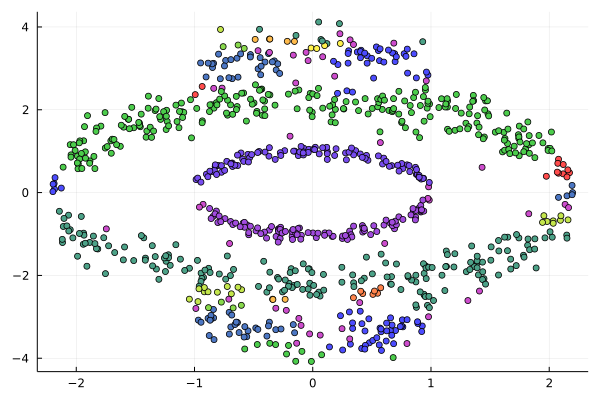

In [222]:
c5 = dbscan(D2, 0.135, 6)
scatter(DF.x, DF.y, marker_z= c5.assignments,
        color=:lightrainbow, legend=false)